# Tratamento da Base Mamirauá com Espécies Binarizadas

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sn

In [19]:
base_12_13 = pd.read_excel("mamiraua-2012-2013.xlsx",index_col=0)
base_13_14 = pd.read_excel("mamiraua-2013-2014.xlsx",index_col=0)
base_14_15 = pd.read_excel("mamiraua-2014-2015.xlsx",index_col=0)
base_15_16 = pd.read_excel("mamiraua-2015-2016.xlsx",index_col=0)
base_16_17 = pd.read_excel("mamiraua-2016-2017.xlsx",index_col=0)
base_17_18 = pd.read_excel("mamiraua-2017-2018.xlsx",index_col=0)

In [20]:
base = pd.concat([base_12_13,base_13_14,base_14_15,base_15_16,base_16_17,base_17_18],sort=False)

In [21]:
base.head()
# O que são as características X e Y?

,Habitat,Class,Order,Family,Genus,Species,Sex,Date,Start Time,End Time,Latitude,Longitude,X,Y
Name,,,,,,,,,,,,,,
RDSM201202,Restinga baixa,Aves,Gruiformes,Rallidae,Aramides,Aramides cajaneus,Unknown,2012-09-26 16:31:22,2012-09-26 16:31:22,2012-09-26 16:33:14,-3.087018,-64.828140,296832.50000,9658614.0
RDSM201202,Restinga baixa,Aves,Gruiformes,Rallidae,Aramides,Aramides cajaneus,Unknown,2012-09-28 11:14:34,2012-09-28 11:14:34,2012-09-28 11:14:38,-3.087018,-64.828140,296832.50000,9658614.0
RDSM201214,Restinga baixa,Aves,Gruiformes,Rallidae,Aramides,Aramides cajaneus,Unknown,2012-10-15 12:05:20,2012-10-15 12:05:20,2012-10-15 12:05:33,-3.058023,-64.853020,294060.96875,9661816.0
RDSM201225,Chavascal,Aves,Gruiformes,Rallidae,Aramides,Aramides cajaneus,Unknown,2012-11-22 07:45:42,2012-11-22 07:45:42,2012-11-22 07:45:52,-3.009989,-64.910637,287645.87500,9667117.0
RDSM201225,Chavascal,Aves,Gruiformes,Rallidae,Aramides,Aramides cajaneus,Unknown,2012-12-02 06:55:00,2012-12-02 06:55:00,2012-12-02 06:55:09,-3.009989,-64.910637,287645.87500,9667117.0


In [22]:
base = base.reset_index()
base.columns = ['Nome', 'Habitat', 'Classe', 'Ordem', 'Familia', 'Genero', 'Especie', 'Sexo',
       'Data', 'Tmp_Inicio', 'Tmp_Fim', 'Latitude', 'Longitude', 'X', 'Y']

In [23]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Nome        9988 non-null   object        
 1   Habitat     9988 non-null   object        
 2   Classe      8149 non-null   object        
 3   Ordem       7630 non-null   object        
 4   Familia     7630 non-null   object        
 5   Genero      7172 non-null   object        
 6   Especie     9988 non-null   object        
 7   Sexo        3589 non-null   object        
 8   Data        9988 non-null   datetime64[ns]
 9   Tmp_Inicio  9988 non-null   datetime64[ns]
 10  Tmp_Fim     9988 non-null   datetime64[ns]
 11  Latitude    9988 non-null   float64       
 12  Longitude   9988 non-null   float64       
 13  X           9988 non-null   float64       
 14  Y           9988 non-null   float64       
dtypes: datetime64[ns](3), float64(4), object(8)
memory usage: 1.1+ MB


In [24]:
# Eliminação de variáveis com poucos dados e pouco redundantes
base.drop(['Sexo','Classe','Ordem','Genero','Familia','Nome','Tmp_Inicio','Tmp_Fim'],axis=1,inplace=True)

# Eliminação por serem equivalentes a latitude e longitude
base.drop(['X','Y'],axis=1,inplace=True)

In [25]:
# Hora é uma granularidade muito baixa, então deixaremos só dia por enquanto
base.Data = base.Data.dt.strftime('%Y%m%d')
base.Data = base.Data.astype(int)

In [26]:
base.head()

,Habitat,Especie,Data,Latitude,Longitude
0,Restinga baixa,Aramides cajaneus,20120926,-3.087018,-64.828140
1,Restinga baixa,Aramides cajaneus,20120928,-3.087018,-64.828140
2,Restinga baixa,Aramides cajaneus,20121015,-3.058023,-64.853020
3,Chavascal,Aramides cajaneus,20121122,-3.009989,-64.910637
4,Chavascal,Aramides cajaneus,20121202,-3.009989,-64.910637


In [27]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Habitat    9988 non-null   object 
 1   Especie    9988 non-null   object 
 2   Data       9988 non-null   int64  
 3   Latitude   9988 non-null   float64
 4   Longitude  9988 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.3+ KB


## Sobre a base

In [28]:
print("-> A base contém",len(set(base['Especie'])),"espécies considerando \'Unknown\'.")

-> A base contém 56 espécies considerando 'Unknown'.


In [29]:
print("Os habitats identificados são",base.Habitat.unique())

Os habitats identificados são ['Restinga baixa' 'Chavascal' 'Restinga alta']


In [30]:
print("Chavascal:",len(base[base.Habitat=='Chavascal']))
print("Restinga baixa:",len(base[base.Habitat=='Restinga baixa']))
print("Restinga alta:",len(base[base.Habitat=='Restinga alta']))

Chavascal: 735
Restinga baixa: 6514
Restinga alta: 2739


In [31]:
# Consideramos que o habitat não é importante
base.drop('Habitat',axis=1,inplace=True)

In [32]:
print("Número de espécies:",len(base[base['Especie']!="Uknown"]))

Número de espécies: 9507


In [33]:
ni = list(filter(lambda x: True if 'NI' in x or x == 'Uknown' else False, base.Especie.unique()))
print(len(ni),"Espécies não identificadas: \n",ni)

8 Espécies não identificadas: 
 ['Ave - NI', 'Ave - NI Rapinante', 'Mamifero - NI', 'Mamifero - NI Roedor', 'Mamifero - NI Marsupial', 'Uknown', 'Mamífero - NI Marsupial', 'Squamata NI']


In [34]:
# Elimina as espécies Não identificadas
base = base[list(map(lambda x: x not in ni, base.Especie))]

## Geração do vetor de espécies com OneHot

In [35]:
# Geração da base com as espécies binarizadas
base = pd.get_dummies(base)
base.head()

,Data,Latitude,Longitude,Especie_Agamia agami,Especie_Alouatta juara,Especie_Aramides cajaneus,Especie_Aramus guarauna,Especie_Ardea alba,Especie_Ardea cocoi,Especie_Bradypus variegatus,...,Especie_Pilherodius pileatus,Especie_Puma concolor,Especie_Saimiri casiquiarensis,Especie_Saimiri vanzolinii,Especie_Sapajus macrocephalus,Especie_Tamandua tetradactyla,Especie_Tayassu pecari,Especie_Tigrisoma lineatum,Especie_Tupinambis teguixin,Especie_Tyto furcata
0,20120926,-3.087018,-64.828140,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20120928,-3.087018,-64.828140,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20121015,-3.058023,-64.853020,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20121122,-3.009989,-64.910637,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20121202,-3.009989,-64.910637,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Há datas repetidas
len(base.Data.unique()) == len(base)

False

In [37]:
base = base.groupby(['Data','Latitude','Longitude']).sum().reset_index()
base.head()

,Data,Latitude,Longitude,Especie_Agamia agami,Especie_Alouatta juara,Especie_Aramides cajaneus,Especie_Aramus guarauna,Especie_Ardea alba,Especie_Ardea cocoi,Especie_Bradypus variegatus,...,Especie_Pilherodius pileatus,Especie_Puma concolor,Especie_Saimiri casiquiarensis,Especie_Saimiri vanzolinii,Especie_Sapajus macrocephalus,Especie_Tamandua tetradactyla,Especie_Tayassu pecari,Especie_Tigrisoma lineatum,Especie_Tupinambis teguixin,Especie_Tyto furcata
0,20120919,-3.087018,-64.828140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20120919,-3.070510,-64.826599,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20120919,-3.066815,-64.842255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20120920,-3.081729,-64.845528,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20120920,-3.070510,-64.826599,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


[]

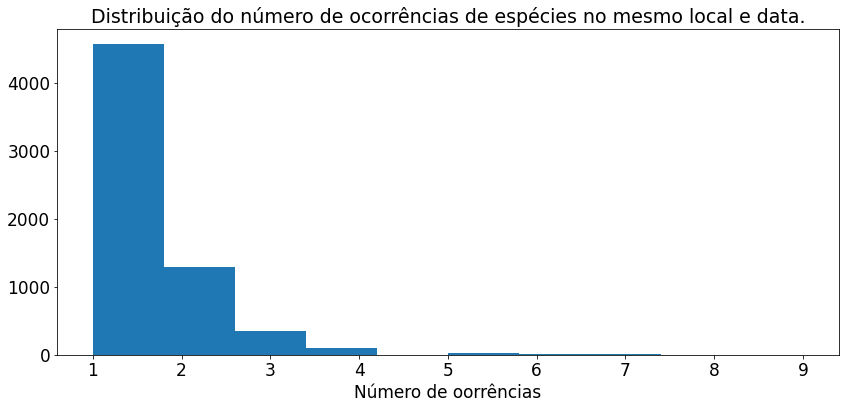

In [38]:
x = base.drop(['Data','Latitude','Longitude'],axis=1).sum(axis=1).values
plt.figure(figsize=(14,6))
plt.rc('font', size=17)
plt.rc('axes', titlesize=19)
plt.title("Distribuição do número de ocorrências de espécies no mesmo local e data.")
plt.xlabel("Número de oorrências")
plt.hist(x)
plt.plot()

In [39]:
especie_alvo = 'Especie_Didelphis marsupialis'

In [40]:
# Existem dados em que se eliminar a espécie em questão, não restarão espécies?
(base.drop(['Data','Latitude','Longitude',especie_alvo],axis=1).sum(axis=1).values == 0).any()

True

In [41]:
# Um vetor de espécies totalmente zerado não é interessante, então o eliminaremos
base = base[base.drop(['Data','Latitude','Longitude',especie_alvo],axis=1).sum(axis=1) != 0]

In [42]:
# Agora não há mais dados em que apenas a espécies em questão foi vista.
(base.drop(['Data','Latitude','Longitude',especie_alvo],axis=1).sum(axis=1).values == 0).any()

False

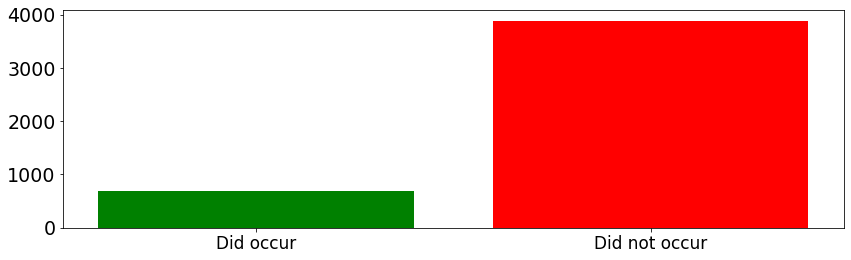

Apareceu = 687 
Não apareceu = 3885


In [43]:
apareceu = len(base[base[especie_alvo] > 0])
nao_apareceu = len(base[base[especie_alvo] == 0])
plt.figure(figsize=(14,4))
plt.rc('font', size=19)
plt.rc('axes', titlesize=19)
# plt.title("Número de dados por classe")
# plt.xlabel("Classes")
plt.xticks([0,1],['Did occur','Did not occur'],size=17)
plt.bar([0,1],[apareceu,nao_apareceu],color=['green','red'])
plt.show()
print("Apareceu =",apareceu,"\nNão apareceu =",nao_apareceu)

## Merge com a base climática

In [44]:
clima = pd.read_csv('base_metereologica_tratada_OneHot.csv')
clima.drop('Unnamed: 0',axis=1,inplace=True)

In [45]:
clima.columns

Index(['temp', 'pressao', 'humidade', 'veloc_vento', 'nuvens', 'chuva/3h',
       'hora', 'data', 'Clear', 'Clouds', 'Drizzle', 'Fog', 'Mist', 'Rain',
       'Smoke', 'Thunderstorm'],
      dtype='object')

In [46]:
clima.columns = ['Temp', 'Pressao', 'Humidade', 'Veloc_vento', 'Nuvens', 'Chuva_3h', 'Hora', 'Data',
       'Clear','Clouds','Drizzle','Fog','Mist','Rain', 'Smoke', 'Thunderstorm']

In [47]:
clima.drop('Hora',axis=1,inplace=True)

In [48]:
clima.head()

,Temp,Pressao,Humidade,Veloc_vento,Nuvens,Chuva_3h,Data,Clear,Clouds,Drizzle,Fog,Mist,Rain,Smoke,Thunderstorm
0,35.200000,1013.000000,45.000000,1.000000,80.000000,0.0,20121001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.525000,1011.250000,86.750000,1.000000,48.125000,0.0,20121002,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.836500,1011.850000,71.500000,0.950000,59.250000,0.0,20121003,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.363478,1011.695652,69.782609,0.956522,44.782609,0.0,20121004,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.034444,1011.277778,68.611111,1.666667,52.777778,0.0,20121005,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [49]:
# Tira a média de cada dado por dia
clima = clima.groupby('Data').mean().reset_index()

In [50]:
clima.head()

,Data,Temp,Pressao,Humidade,Veloc_vento,Nuvens,Chuva_3h,Clear,Clouds,Drizzle,Fog,Mist,Rain,Smoke,Thunderstorm
0,20121001,35.200000,1013.000000,45.000000,1.000000,80.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20121002,25.525000,1011.250000,86.750000,1.000000,48.125000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20121003,28.836500,1011.850000,71.500000,0.950000,59.250000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20121004,30.363478,1011.695652,69.782609,0.956522,44.782609,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20121005,30.034444,1011.277778,68.611111,1.666667,52.777778,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [51]:
df = pd.merge(base,clima,left_on='Data',right_on='Data')
df.head()

,Data,Latitude,Longitude,Especie_Agamia agami,Especie_Alouatta juara,Especie_Aramides cajaneus,Especie_Aramus guarauna,Especie_Ardea alba,Especie_Ardea cocoi,Especie_Bradypus variegatus,...,Nuvens,Chuva_3h,Clear,Clouds,Drizzle,Fog,Mist,Rain,Smoke,Thunderstorm
0,20121001,-3.045530,-64.861877,0,0,0,0,0,0,0,...,80.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20121001,-3.027342,-64.871628,0,0,0,0,0,0,0,...,80.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20121001,-3.017972,-64.879883,0,0,0,0,0,0,0,...,80.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20121002,-3.087018,-64.828140,0,0,0,0,0,0,0,...,48.125,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20121002,-3.081729,-64.845528,0,0,0,0,0,0,0,...,48.125,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4427 entries, 0 to 4426
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Data                                    4427 non-null   int64  
 1   Latitude                                4427 non-null   float64
 2   Longitude                               4427 non-null   float64
 3   Especie_Agamia agami                    4427 non-null   uint8  
 4   Especie_Alouatta juara                  4427 non-null   uint8  
 5   Especie_Aramides cajaneus               4427 non-null   uint8  
 6   Especie_Aramus guarauna                 4427 non-null   uint8  
 7   Especie_Ardea alba                      4427 non-null   uint8  
 8   Especie_Ardea cocoi                     4427 non-null   uint8  
 9   Especie_Bradypus variegatus             4427 non-null   uint8  
 10  Especie_Busarellus nigricollis          4427 non-null   uint

## Criando janela deslizante

In [36]:
# Função para printar barra de progresso
import time, sys
from IPython.display import clear_output
def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [37]:
df.Data = df.Data.astype(int)
df.Data = df.Data.apply(lambda x: pd.Timestamp(str(x)))

ocorr_especie_alvo = df[especie_alvo]
gb = df.groupby(['Latitude','Longitude','Data']).sum().reset_index()
df = df.groupby(['Latitude','Longitude','Data']).sum().reset_index()
lt = gb.loc[0].Latitude
lg = gb.loc[0].Longitude

janela = 2
fim = janela 
ini = 0
update_progress(0)
n = gb.shape[0]
count = 1
while fim < n:
    date = gb.iloc[fim,2] - pd.Timedelta(days=janela)
    a = np.array(gb.iloc[fim])
    j = fim-1
    while (ini <= j):
        if gb.iloc[j,0] == gb.iloc[fim,0] and gb.iloc[j,1] == gb.iloc[fim,1] and date <= gb.iloc[j,2]:
            a[3:-14] += gb.iloc[j][3:-14]
            a[51:] += gb.iloc[j][51:]
            count += 1
        else:
            break
        j-=1
    a[51:] = a[51:]/count
    df.iloc[fim] = a
    fim+=1
    ini = fim-janela
    count = 1
    update_progress(fim/n)
update_progress(1)
df[especie_alvo] = ocorr_especie_alvo

df.Data = df.Data.dt.strftime('%Y%m%d')
df.Data = df.Data.astype(int)

Progress: [####################] 100.0%


[]

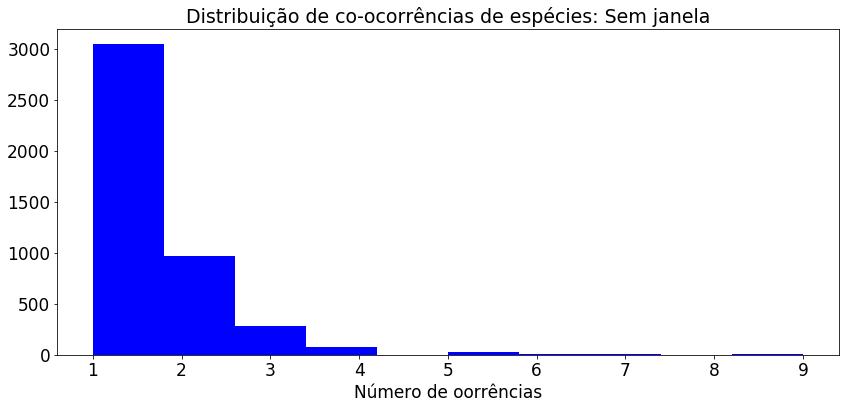

In [274]:
x = df.iloc[:,3:-14].sum(axis=1).values
plt.figure(figsize=(14,6))
plt.rc('font', size=17)
plt.rc('axes', titlesize=19)
plt.title("Distribuição de co-ocorrências de espécies: Sem janela")
plt.xlabel("Número de oorrências")
plt.hist(x,color='blue')
plt.plot()

[]

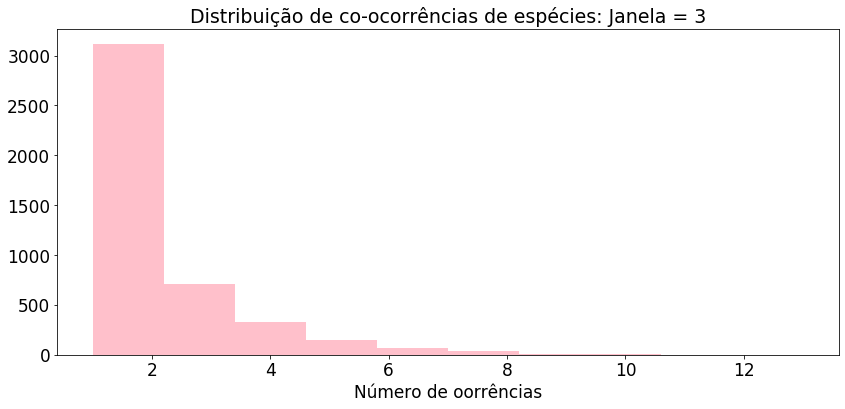

In [49]:
x = df.iloc[:,3:-14].sum(axis=1).values
plt.figure(figsize=(14,6))
plt.rc('font', size=17)
plt.rc('axes', titlesize=19)
plt.title("Distribuição de co-ocorrências de espécies: Janela = 3")
plt.xlabel("Número de oorrências")
plt.hist(x,color='pink')
plt.plot()

[]

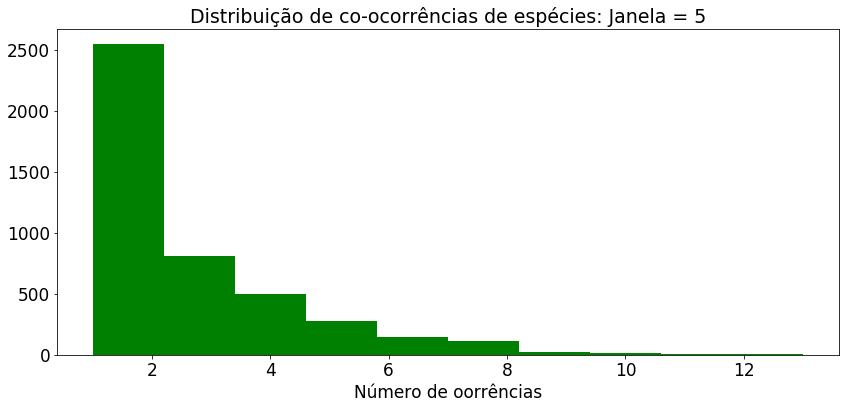

In [262]:
x = df.iloc[:,3:-14].sum(axis=1).values
plt.figure(figsize=(14,6))
plt.rc('font', size=17)
plt.rc('axes', titlesize=19)
plt.title("Distribuição de co-ocorrências de espécies: Janela = 5")
plt.xlabel("Número de oorrências")
plt.hist(x,color='green')
plt.plot()

[]

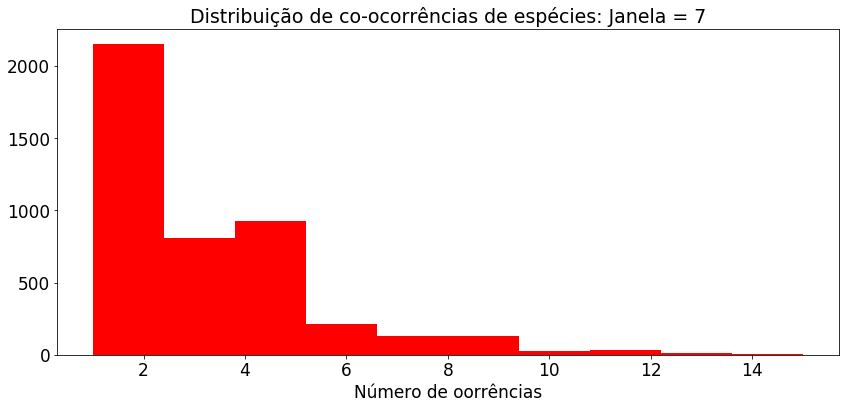

In [271]:
x = df.iloc[:,3:-14].sum(axis=1).values
plt.figure(figsize=(14,6))
plt.rc('font', size=17)
plt.rc('axes', titlesize=19)
plt.title("Distribuição de co-ocorrências de espécies: Janela = 7")
plt.xlabel("Número de oorrências")
plt.hist(x,color='red')
plt.plot()

## Tabela de co-ocorrência

In [79]:
esps = df.iloc[:,3:-14]
esps.head()

,Especie_Agamia agami,Especie_Alouatta juara,Especie_Aramides cajaneus,Especie_Aramus guarauna,Especie_Ardea alba,Especie_Ardea cocoi,Especie_Bradypus variegatus,Especie_Busarellus nigricollis,Especie_Buteogallus schistaceus,Especie_Cacajao calvus,...,Especie_Pilherodius pileatus,Especie_Puma concolor,Especie_Saimiri casiquiarensis,Especie_Saimiri vanzolinii,Especie_Sapajus macrocephalus,Especie_Tamandua tetradactyla,Especie_Tayassu pecari,Especie_Tigrisoma lineatum,Especie_Tupinambis teguixin,Especie_Tyto furcata
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
d = esps.shape[1]
tab = np.zeros((d,d))
for i in range(d):
    tab[:,i] = list(map(lambda x: 1 if x > 0 else 0,esps[esps.iloc[:,i] > 0].sum()))

[]

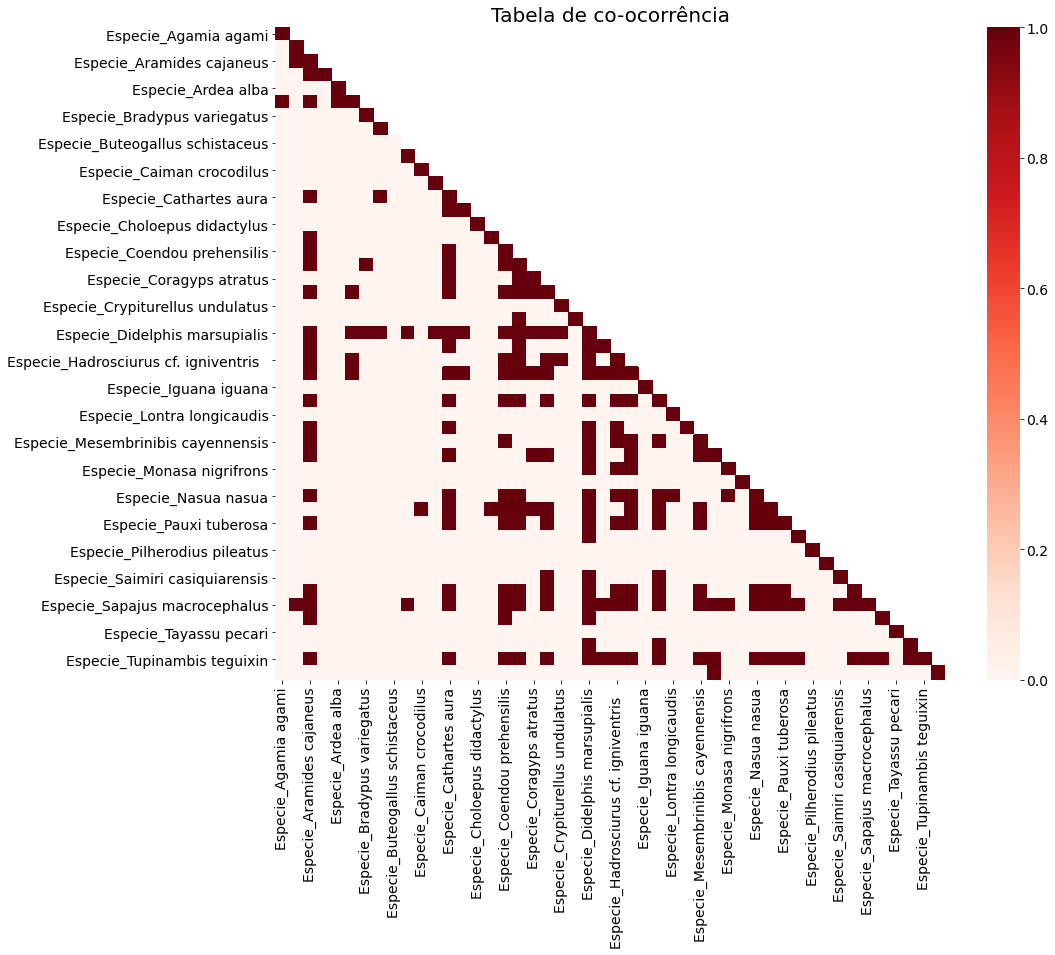

In [84]:
cm = pd.DataFrame(tab,index=esps.columns,columns=esps.columns)
mask = np.zeros_like(tab, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True
plt.figure(figsize = (15,12))
plt.rc('font',size=14)
sn.heatmap(cm, annot=False,cmap='Reds', mask=mask)
plt.title("Tabela de co-ocorrência",size=20)
# plt.savefig('modelos_onehot/cm_modelQ.pdf', format="pdf", bbox_inches='tight')
plt.plot()

## Agrupamento de Coordenadas Geográficas em Regiões

In [50]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df[['Latitude','Longitude']])

In [51]:
regioes = ['A','B','C','D','E','F','G','H','I','J']
df['Regiao'] = list(map(lambda x: regioes[x],kmeans.labels_))
df = pd.get_dummies(df)

In [52]:
df.head()

,Data,Latitude,Longitude,Especie_Agamia agami,Especie_Alouatta juara,Especie_Aramides cajaneus,Especie_Aramus guarauna,Especie_Ardea alba,Especie_Ardea cocoi,Especie_Bradypus variegatus,...,Regiao_A,Regiao_B,Regiao_C,Regiao_D,Regiao_E,Regiao_F,Regiao_G,Regiao_H,Regiao_I,Regiao_J
0,20121001,-3.045530,-64.861877,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20121001,-3.027342,-64.871628,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,20121001,-3.017972,-64.879883,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,20121002,-3.087018,-64.828140,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20121002,-3.081729,-64.845528,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [54]:
len(df[df['Especie_Didelphis marsupialis'] > 0])

670

[]

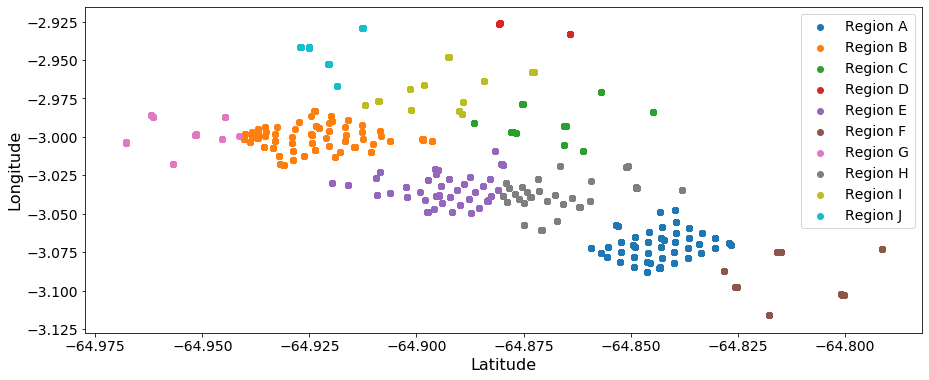

In [57]:
plt.figure(figsize=(15, 6))
plt.ylabel("Longitude",size=16)
plt.xlabel("Latitude",size=16)
# plt.title("Coordenadas das espécies agrupadas",size=18)

# Printa cada ponto geográfico de acordo ao grupo pertencente
k_pred = kmeans.predict(df[['Latitude','Longitude']])
for i in range(n_clusters):
    p = df[k_pred == i]
    x = np.array(p['Longitude'])
    y = np.array(p['Latitude'])
    plt.scatter(x,y,alpha=1,label='Region '+regioes[i])
plt.legend()
plt.rc('font',size=14)
plt.plot()

In [58]:
df.drop(['Latitude','Longitude'],axis=1,inplace=True)

## Preparação da base para o modelo

In [59]:
# Normalização dos aparecimentos de espécies entre 0 e 1
df.iloc[:,3:-24] = df.iloc[:,3:-24].apply(lambda y: list(map(lambda x: 1 if x > 0 else 0,y)))

In [60]:
df[df[especie_alvo] == 1].shape[0]

670

In [60]:
naoApareceuUnder = df[df[especie_alvo] == 0].sample(n=df[df[especie_alvo] == 1].shape[0])
df_balanceado = pd.concat([naoApareceuUnder,df[df[especie_alvo] == 1]]).sample(frac=1)

In [61]:
X = df_balanceado.drop(especie_alvo,axis=1)
y = df_balanceado[especie_alvo]

In [62]:
# Normalização da base X com o MinMax Scaler
mms = MinMaxScaler()
cols = X.columns
df_minmax = mms.fit_transform(X)
X = pd.DataFrame(df_minmax, columns=cols)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [64]:
X_train.head()

,Data,Especie_Agamia agami,Especie_Alouatta juara,Especie_Aramides cajaneus,Especie_Aramus guarauna,Especie_Ardea alba,Especie_Ardea cocoi,Especie_Bradypus variegatus,Especie_Busarellus nigricollis,Especie_Buteogallus schistaceus,...,Regiao_A,Regiao_B,Regiao_C,Regiao_D,Regiao_E,Regiao_F,Regiao_G,Regiao_H,Regiao_I,Regiao_J
407,0.844617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68,0.847662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
153,0.999882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0.338510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0.847916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
X_train.to_csv('Base_esp_onehot/X_train_window_3_mean.csv')
X_test.to_csv('Base_esp_onehot/X_test_window_3_mean.csv')
np.save('Base_esp_onehot/y_train_window_3_mean.npy',y_train)
np.save('Base_esp_onehot/y_test_window_3_mean.npy',y_test)